 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 02 </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Linear Regression </b> <br>
This programing assignment is divided in to two parts covering the understanding of basic parts where you will get a chance to code the linear regression problem in both data space and kernel space. You will also implement regularizers to understand the bias-variance trade-off problem. In contrast to the full batch training, you will also get chance to code the online training of linear regression problem as discussed in the class. Part1 will conclude with the implimentation of MAP estimate. Later, In part2 of the assignment you have to apply the learned basic concepts to real world problems. 




<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$ Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

In [56]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
%matplotlib notebook

<IPython.core.display.Javascript object>


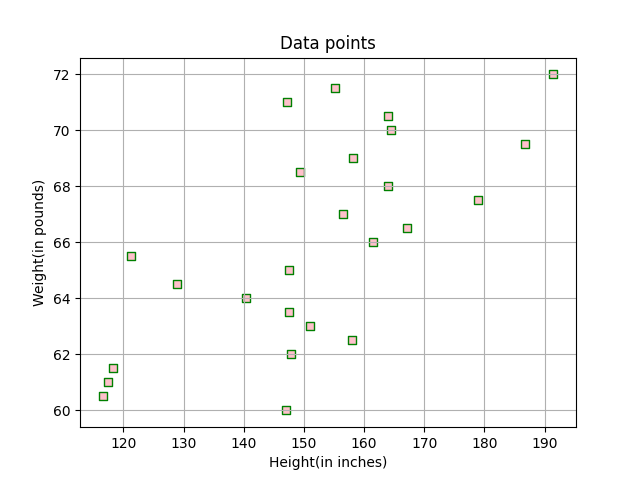

In [57]:
########################################
#Generate meaningfull data 
########################################

x = np.linspace(60, 72, 25).reshape(-1, 1)
t = 3.86*x - 110.42 + np.random.normal(0, 20, size=(25, 1))

########################################
#Plot scatter plot of data
########################################
plt.figure()
plt.title("Data points")
plt.scatter(t, x, marker="s", c="pink", edgecolor="green")
plt.grid()
plt.xlabel("Height(in inches)")
plt.ylabel("Weight(in pounds)")
plt.show()

In [58]:
########################################
#Parameter prediction by locating the minima of error surface
########################################
#Complete the below error function 
def Error(W, T, X): #inputs : 1)weight 2)data i.e (t,x)
    e = T - X@W
    return 0.5*np.trace(e@e.T)

<IPython.core.display.Javascript object>


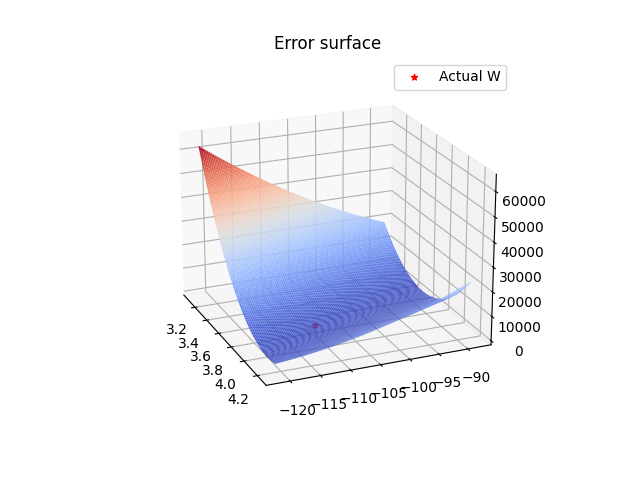

In [59]:
X = np.hstack((x, np.ones((25, 1))))

#Sample a bunch of w's around w_opt and compute the associated error
number_of_samples = 100

# w_opt = np.linalg.inv(X.T@X)@(X.T)@t
w_actual = np.array([3.86, -110.42]).reshape(-1, 1)

w_1 = np.linspace(w_actual[0]*0.8, w_actual[0]*1.1, number_of_samples)
w_0 = np.linspace(w_actual[1]*0.8, w_actual[1]*1.1, number_of_samples)
w_x, w_y = np.meshgrid(w_1, w_0)

J = np.zeros((number_of_samples, number_of_samples))
for i in range(number_of_samples):
    for j in range(number_of_samples):
        W = np.array([w_x[i, j], w_y[i, j]]).reshape(-1, 1)
        J[i, j] = Error(W, t, X)

#Plot 3D error surface and the corresponding contour plots
ax = plt.axes(projection='3d')
ax.plot_surface(w_x, w_y, J, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')
ax.set_title('Error surface');

#Locate the minima of the error surface
ax.scatter(w_actual[0], w_actual[1], Error(w_actual, t, X), marker="*", c="red", label="Actual W")
plt.legend()
plt.show()

In [60]:
########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
def LinearRegression(X, t): #inputs : 1)input data i.e (x). 2)target i.e (t)
    w_opt = np.linalg.inv(X.T@X)@(X.T)@t
    return w_opt

<IPython.core.display.Javascript object>


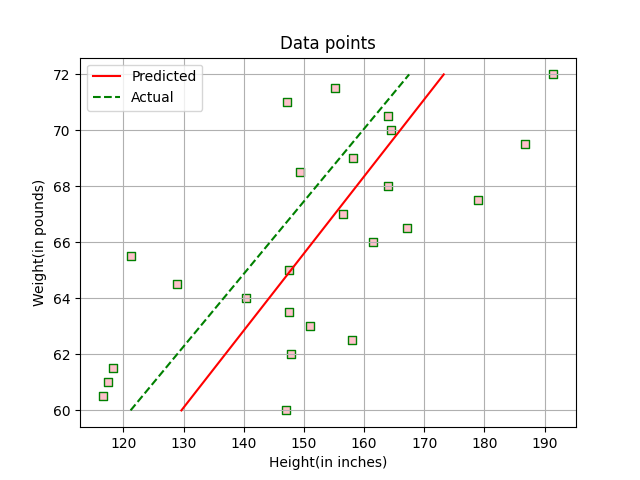

In [61]:
#Estimate optimal weight's using "LinearRegression" function

w_LR = LinearRegression(X, t)

#Estimate the targets using the input x and the estimated weights

t_hat = X@w_LR

#Plot the estimated line on top of the above scatter plot
plt.figure()
plt.title("Data points")
plt.scatter(t, x, marker="s", c="pink", edgecolor="green")
plt.plot(t_hat, x, "r",label="Predicted")
plt.plot(3.86*x - 110.42, x, "--g",label="Actual")
plt.grid()
plt.xlabel("Height(in inches)")
plt.ylabel("Weight(in pounds)")
plt.legend();

<IPython.core.display.Javascript object>


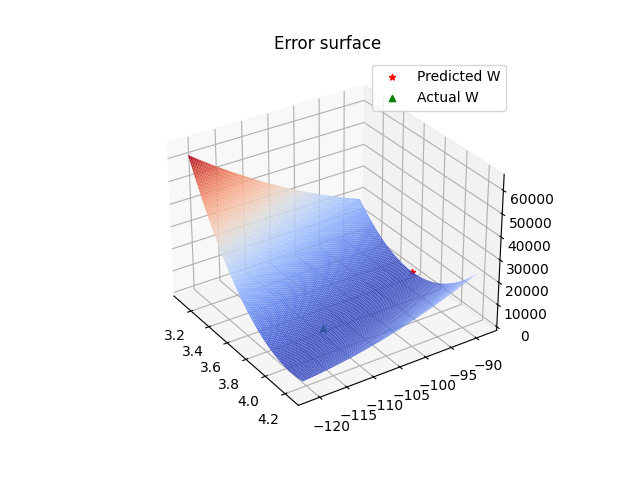

In [63]:
########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################
ax = plt.axes(projection='3d')
ax.plot_surface(w_x, w_y, J, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')
ax.set_title('Error surface');

#Locate the minima of the error surface
ax.scatter(w_LR[0], w_LR[1], Error(w_LR, t, X), marker="*", c="red", label="Predicted W")
ax.scatter(w_actual[0], w_actual[1], Error(w_actual, t, X), marker="^", c="green", label="Actual W")

plt.legend()
plt.show()

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set each containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0}x + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center> 

Use the estimated parameter vector $\textbf{w}$ , to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

In [ ]:
########################################
#Generate 20 data points
########################################



#Obtain train and test splits



########################################
#Fitting Mth degree polynomial using least squares approach
########################################
#Complete the function
def PolynomialFit(X_train,Y_train,M,lamda):



    return w_opt
#Complete the function
def PolynomialPred(w_est,X_train,X_test,Y_train,Y_test):



    return TrainError,TestError
#Iterate through range of M values
M_range=list(range(10))
for M in M_range:
    #Fit Mth order polynomial i.e estimate optimal w



    #Predict errors on both training and testing data using estimated w



    #Store them for plotting

#Plot training error vs polynomial order and testing error vs polynomial order

########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################







########################################
#Effect of regularization
########################################
#Consider a set of lambda's

#Repeat (b) and (c). Submit the plots for M=3,5,7






########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias




#Generate data




#Estimate the polynomial with and without regularization constraint




#Compare the two estimated polynomials and report the observations





<b> Part - (3) : Understanding choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case,for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\ 
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

In [ ]:
########################################
#Generate 100 data points
########################################



#Obtian train and test splits
#Take even samples for training and odd samples for testing



def KernelRegressionFit(X_train,Y_train,kernelType,M,lamda):
    #kernelType : {Polynomial,Gaussian,Sigmoid}


    return w_opt

def KernelRegressionPred(w_est,X_train,Y_train,X_test,Y_test,kernelType):
    #kernelType : {Polynomial,Gaussian,Sigmoid}


    return TrainError,TestError

#Iterate through range of M values
M_range=list(range(10))
for M in M_range:
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}



    #Predict errors on both training and testing data using estimated w



    #Store them for plotting

#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels




########################################
#Repeat the experiments by changing target function
########################################







<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations. 

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

In [ ]:

########################################
#Repeat 3(a) and 3(b) using stochastic gradient descent for weight update ( plot required results )
########################################
#Complete the function
def OnlineTraining(X_train,Y_train,kernelType,M,Epochs,BatchSize,stepSize):
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #Initialize the weights
    #Initialize the necessary variables
    #Iterate through epochs
        #Iterate through the batches
            #Initialize the necessary variables
            #Get a batch of data
            #Iterate through the data points of obtained batch
                #Obtain kernel representation
                #Compute the gradient of weight's
                #Compute the running mean of the weights gradients for the batch update
            #Update the weights using mean gradient, consider using reasonable stepSize

     return w_opt

def OnlinePred(w_est,X_train,Y_train,X_test,Y_test,kernelType):
    #kernelType : {Polynomial,Gaussian,Sigmoid}


    return TrainError,TestError

#Evalate models


########################################
#Study the effect of stepSize on the convergence of weights ( plot required results )
########################################







########################################
#Study the effect of batchsize on the speed of convergence ( plot required results )
########################################











<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints ( low,middle and high ) 
2.   For each regularization coefficient, Obtain three plots of 100 estimated curves and their mean i.e Illustrates the concept of variance
3. For each regularization coefficient, Obtain three plots of mean and the original function i.e Illustrates the concept of bias

(b). Report all your observations







In [ ]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################







########################################
#Use regularized least squares to estimate w
########################################







########################################
#Illustrate the concept of Bias-Variance trade off
########################################











<b> Part - (6) : Understanding MAP estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

In [ ]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################





########################################
#Updating statistics of posterior density
########################################
#Initialie the parameters for standard normal prior





#Iterate through the data points and update the stats of posterior density





#You may save the stats of the posterior density while iterating through the data points for predictive distribution analysis





########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################





########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen and plot the curves






#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class








<center> <h2> <b> Real World Problems </b> </h2> </center>

<b> Part - (1): Blog Feedback prediction  </b>
This data originates from blog posts.  The raw HTML-documents of the blogposts were crawled and processed.  The regression task associated with the data is the prediction of the number of comments in the upcoming 24 hours. Inorder to simulate this situation, we choose a base-time (in the past) and select the blog posts that were published at most 72 hours before the selected basedate/time.  Then, we calculate all the features of the selected blog posts from the  information  that  was  available  at  the  basetime,  therefore  each  instance corresponds to a blog post.  The target is the number of comments that the blog post received in the next 24 hours relative to the base time. <br>
[Link to Dataset](http://archive.ics.uci.edu/ml/datasets/BlogFeedback)


<b> Part - (2): Breast Cancer Wisconsin (Prognostic) Data Set </b>
Predict the recurrence time/disease-free time of the breast cancer patients from the first 30 features computed from a digitized image of a fine needle aspirate(FNA) of a breast mass. <br>
[Link to Dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)

<b> Part - (3): Multiple Output Regression </b>
Until now, we mainly concentrated on a single target variable from the input vector. In this example, we use supply chain management data (scm1d) to predict target vector from the input vector. A brief description of multi output regression can be found in Section 3.1.5 of Bishop’s book. <br>
[Link to Dataset](https://osdn.net/projects/sfnet_mulan/downloads/datasets/multi-target%20regression%20datasets/scm1d-train.zip) <br>
[Dataset Description](https://arxiv.org/pdf/1211.6581.pdf)

In [ ]:
#You may use scipy library to load the data set
from scipy.io import arff  
















<b> Report  </b>
1. 

2. 

3. 